# Initial housing_data EDA

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 
sns.set(style="dark",palette="deep")
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

In [2]:
df = pd.read_csv("../../data/housing_data.csv", index_col="id")

## Exploring data

In [3]:
df.head()

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2669329904,324.0,5.0,3.0,4.0,340000.0,house,Sao Tome
2667338201,51.0,2.0,1.5,1.0,295000.0,NaN,Santa Teresa
2643720430,94.0,3.0,4.0,2.0,629000.0,apartment,Cidade Jardim
2681509397,66.0,2.0,2.0,2.0,460000.0,apartment,Imbuí
2671493238,82.0,3.0,3.0,2.0,649990.0,apartment,Piatã


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 2669329904 to 2665920996
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   areas         1028 non-null   float64
 1   bedrooms      1025 non-null   float64
 2   bathrooms     1025 non-null   float64
 3   parkingSpots  857 non-null    float64
 4   prices        1023 non-null   float64
 5   type          1017 non-null   object 
 6   neighborhood  1028 non-null   object 
dtypes: float64(5), object(2)
memory usage: 64.2+ KB


Areas are set in m² and Prices are in BRL.

In [5]:
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,1028.000000,1025.000000,1025.000000,857.000000,1.023000e+03
mean,105.729572,2.291220,1.611707,1.387398,1.867730e+05
std,705.582794,0.547385,0.841409,1.783682,4.618734e+05
min,23.000000,1.000000,1.000000,1.000000,3.500000e+04
25%,67.000000,2.000000,1.000000,1.000000,5.350000e+04
50%,75.000000,2.000000,1.000000,1.000000,8.000000e+04
75%,90.000000,3.000000,2.000000,2.000000,1.490000e+05
max,22670.000000,5.000000,6.000000,50.000000,1.250000e+07


In [6]:
df[df.areas > 2000]

,areas,bedrooms,bathrooms,parkingSpots,prices,type,neighborhood
id,,,,,,,
2676319747,22670.0,NaN,NaN,NaN,12500000.0,NaN,Cia Aeroporto


Areas > 2000 Will be removed since they might not be House/Apartment or might be bad input.

We'll drop any rows without price too

In [7]:
df = df[~(df.prices.isna())]
df = df[~(df.areas > 2000)]
df.describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,1022.000000,1021.000000,1021.000000,853.00000,1.022000e+03
mean,83.893836,2.292850,1.611166,1.38687,1.747249e+05
std,40.075495,0.545874,0.841411,1.78752,2.547421e+05
min,23.000000,1.000000,1.000000,1.00000,3.500000e+04
25%,67.000000,2.000000,1.000000,1.00000,5.325000e+04
50%,75.000000,2.000000,1.000000,1.00000,8.000000e+04
75%,90.000000,3.000000,2.000000,2.00000,1.480000e+05
max,600.000000,5.000000,6.000000,50.00000,3.990000e+06


### Numerical columns

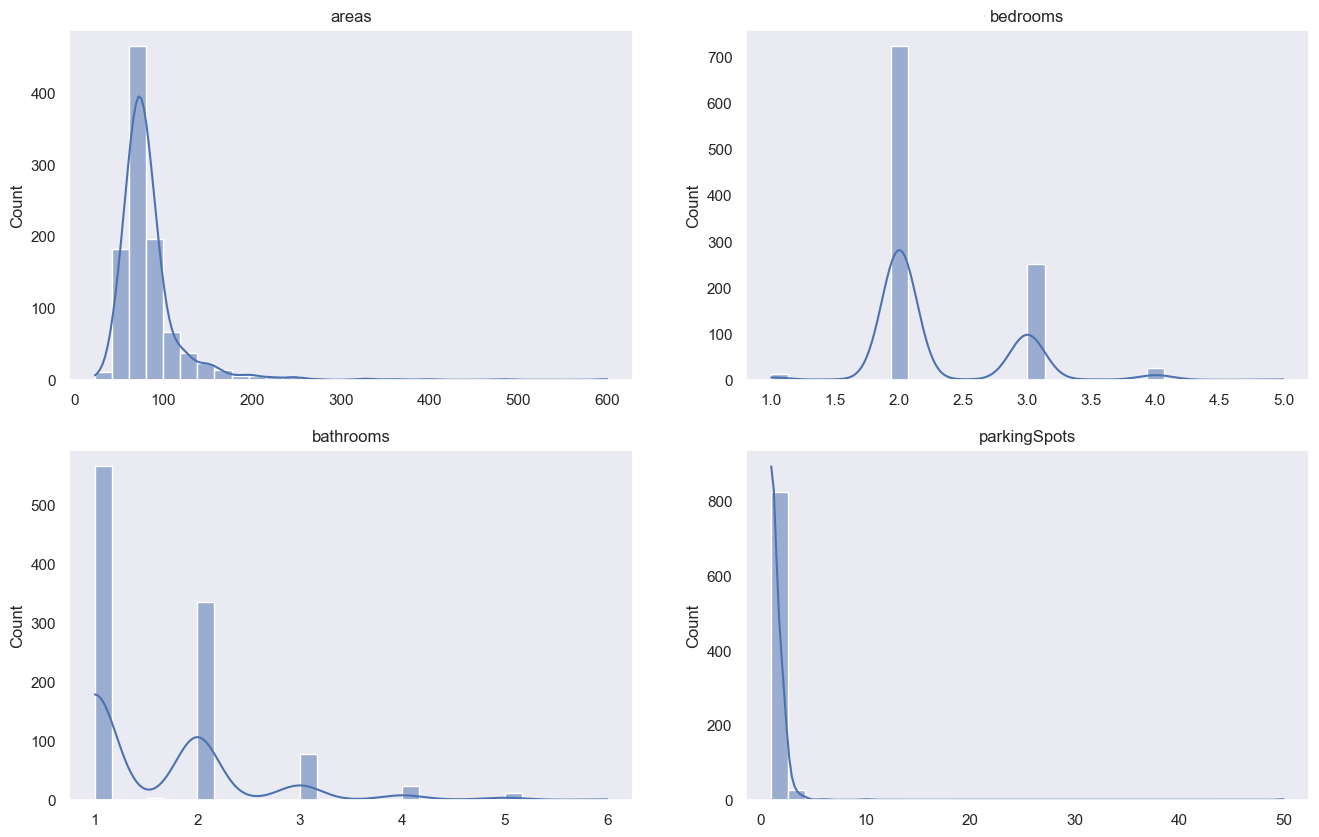

In [8]:
categories = np.reshape(["areas", "bedrooms", "bathrooms", "parkingSpots"], (2,2))

fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in range(2):
    for j in range(2):
        axs[i][j].set_title(categories[i][j])
        sns.histplot(x=df[categories[i][j]], bins=30, ax=axs[i][j], kde=True).set(xlabel=None)

There where a few registers in the discrete columns (i.e. bathrooms, parkingSpots and bedrooms) that where labeled "x-y" (e.g. "2-4" bedrooms),
 so when processing the scraped data, we took the mean of these values.

### Prices

Text(0.5, 1.0, 'Housings under R$ 700,000')

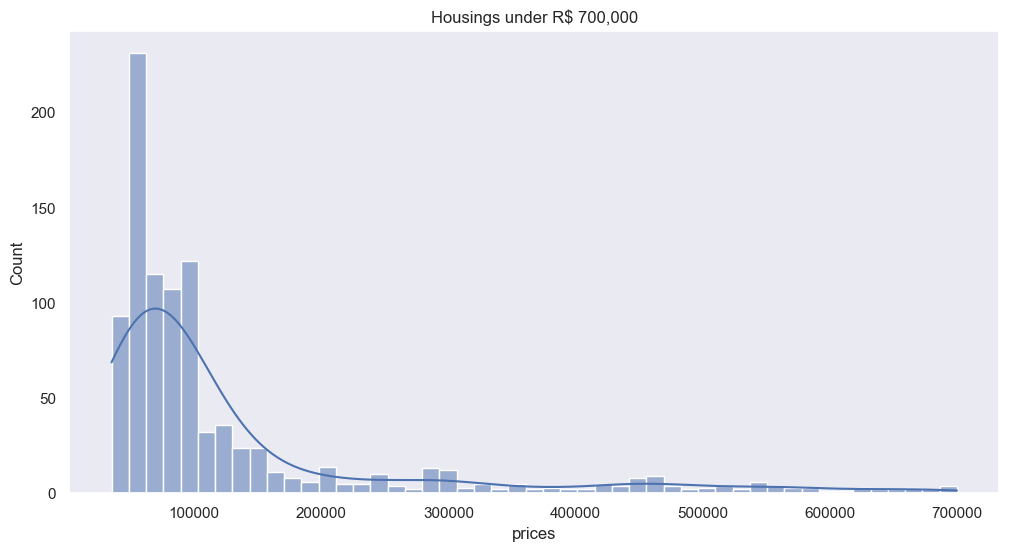

In [9]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices < 700000].prices, kde=True).set_title("Housings under R$ 700,000")

Text(0.5, 1.0, 'Housings over R$ 700,000')

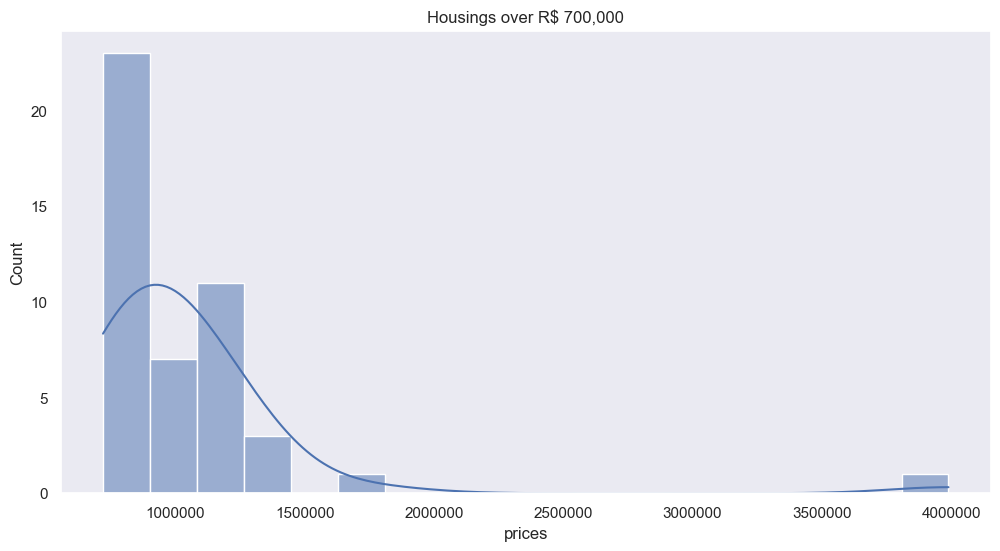

In [10]:
plt.figure(figsize=(12,6))
plt.ticklabel_format(style='plain', axis='x')
sns.histplot(x=df[df.prices > 700000].prices, kde=True).set_title("Housings over R$ 700,000")

### Categorical Columns

In [11]:
df.neighborhood.value_counts()

neighborhood
Ribeira                          54
Paripe                           34
Pernambués                       34
Itapuã                           31
Sao Caetano                      28
BA                               23
Liberdade                        22
Castelo Branco                   20
Boca do Rio                      20
Uruguai                          19
Imbuí                            19
Cajazeiras X                     18
Dom Avelar                       16
Pituba                           16
Patamares                        16
Cabula VI                        14
Caixa D´Água                     14
Plataforma                       14
Bonfim                           14
Iapi                             14
Doron                            14
Fazenda Grande do Retiro         13
Lobato                           13
Engenho Velho de Brotas          13
Pituaçu                          12
Saboeiro                         12
Resgate                          12
Águas Claras   

'BA' seems to be a parsing error due to lack of neighborhood on the raw data (BA stands for Bahia, which is the state, not the neighborhood). We'll set that as NaN.

In [12]:
df.neighborhood = df.neighborhood.apply(lambda x: np.nan if x == "BA" else x)

<Axes: xlabel='type', ylabel='count'>

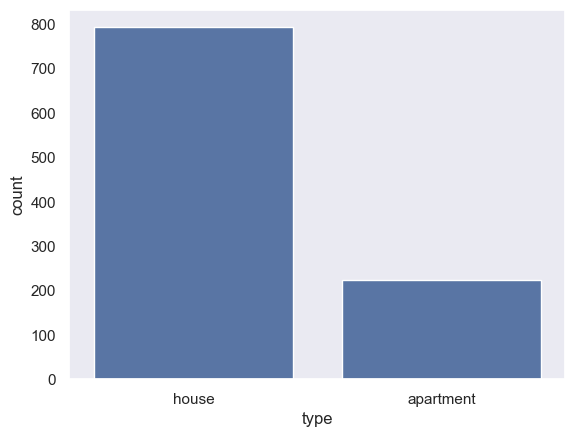

In [13]:
sns.countplot(x=df.type)

### Houses vs Apartments

In [14]:
df[df.type == "apartment"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,224.000000,224.000000,224.000000,206.000000,2.240000e+02
mean,82.582589,2.435268,2.272321,1.798544,4.832704e+05
std,36.875060,0.688833,1.086791,3.429705,3.940074e+05
min,29.000000,1.000000,1.000000,1.000000,4.000000e+04
25%,59.000000,2.000000,1.000000,1.000000,2.188675e+05
50%,75.000000,2.000000,2.000000,2.000000,4.225000e+05
75%,90.000000,3.000000,3.000000,2.000000,6.462475e+05
max,330.000000,4.000000,6.000000,50.000000,3.990000e+06


In [15]:
df[df.type == "house"].describe()

,areas,bedrooms,bathrooms,parkingSpots,prices
count,793.000000,793.000000,793.000000,643.000000,793.000000
mean,84.292560,2.254729,1.422446,1.255054,86443.896595
std,40.947832,0.490497,0.644989,0.641468,70140.976945
min,23.000000,2.000000,1.000000,1.000000,35000.000000
25%,68.000000,2.000000,1.000000,1.000000,50000.000000
50%,75.000000,2.000000,1.000000,1.000000,70000.000000
75%,90.000000,2.000000,2.000000,1.000000,95000.000000
max,600.000000,5.000000,6.000000,10.000000,890000.000000


### Prices vs Areas

<Axes: xlabel='areas', ylabel='prices'>

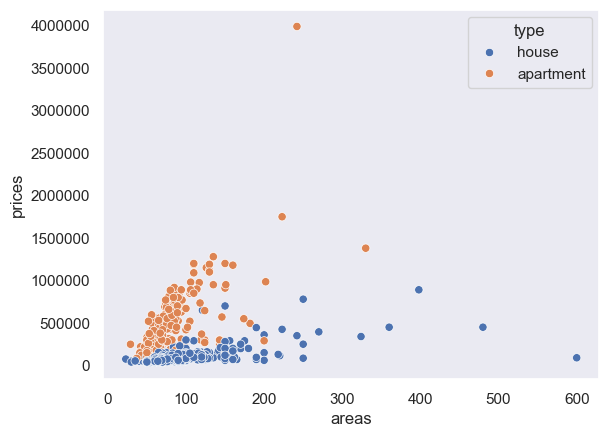

In [16]:
plt.ticklabel_format(style='plain')
sns.scatterplot(x=df.areas, y=df.prices, hue=df.type)

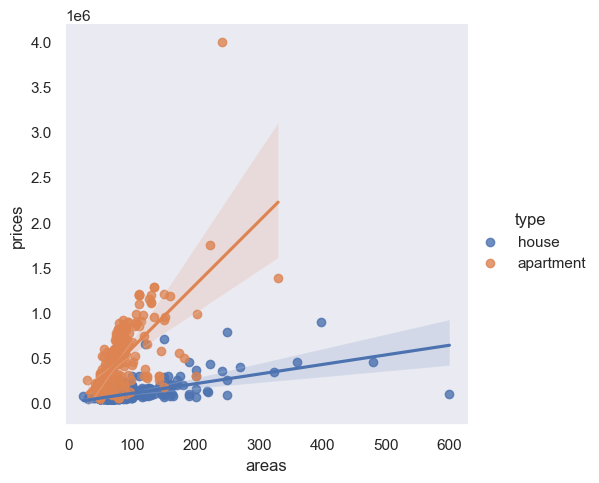

In [17]:
sns.lmplot(data=df, x="areas", y="prices", hue="type")

Apartments' price/area relationship is way more steep than houses'.

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Houses)')]

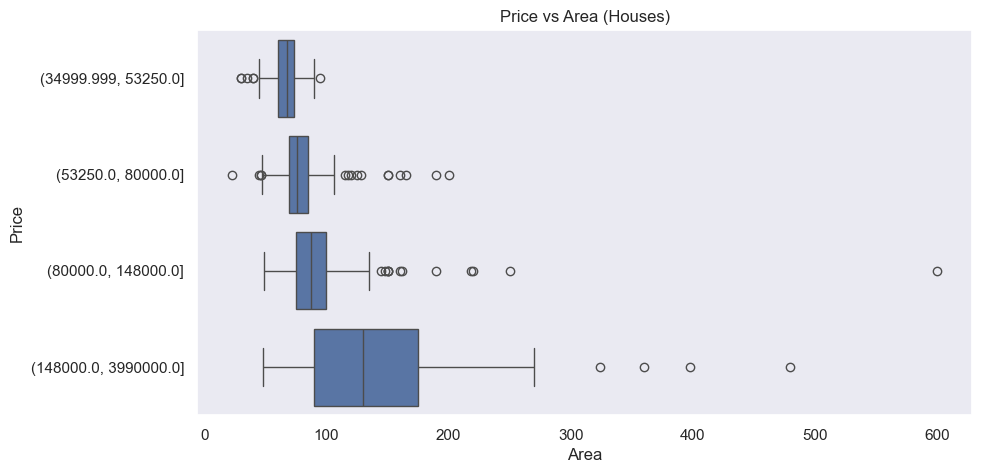

In [18]:
df1 = df.copy()
df1['prices_bins'] = pd.qcut(df.prices, q=[0, .25, .5, .75, 1], duplicates='drop')

plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "house"].areas, y=df1[df1.type == "house"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Houses)")

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Area'),
 Text(0.5, 1.0, 'Price vs Area (Apartments)')]

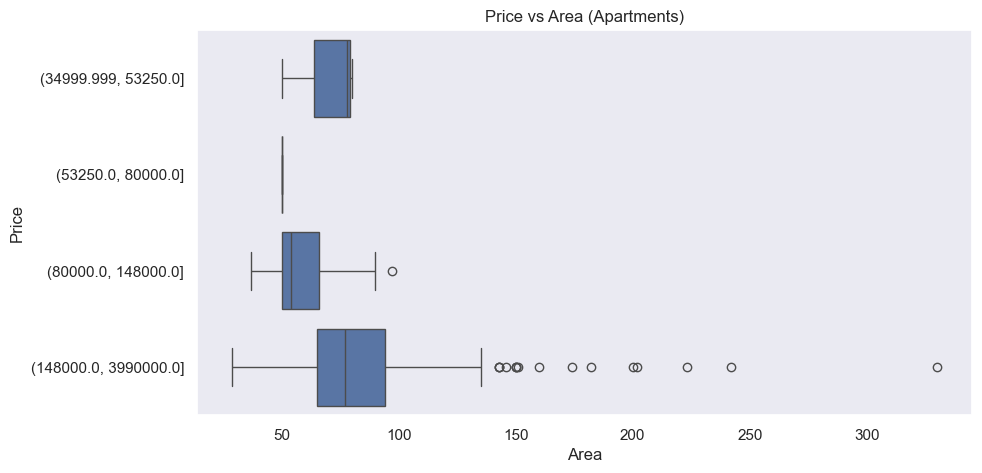

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1[df1.type == "apartment"].areas, y=df1[df1.type == "apartment"].prices_bins).set(
    ylabel="Price", xlabel="Area", title="Price vs Area (Apartments)")

The odd distribution here might be due to lack of apartment data.

### Prices vs Other Features

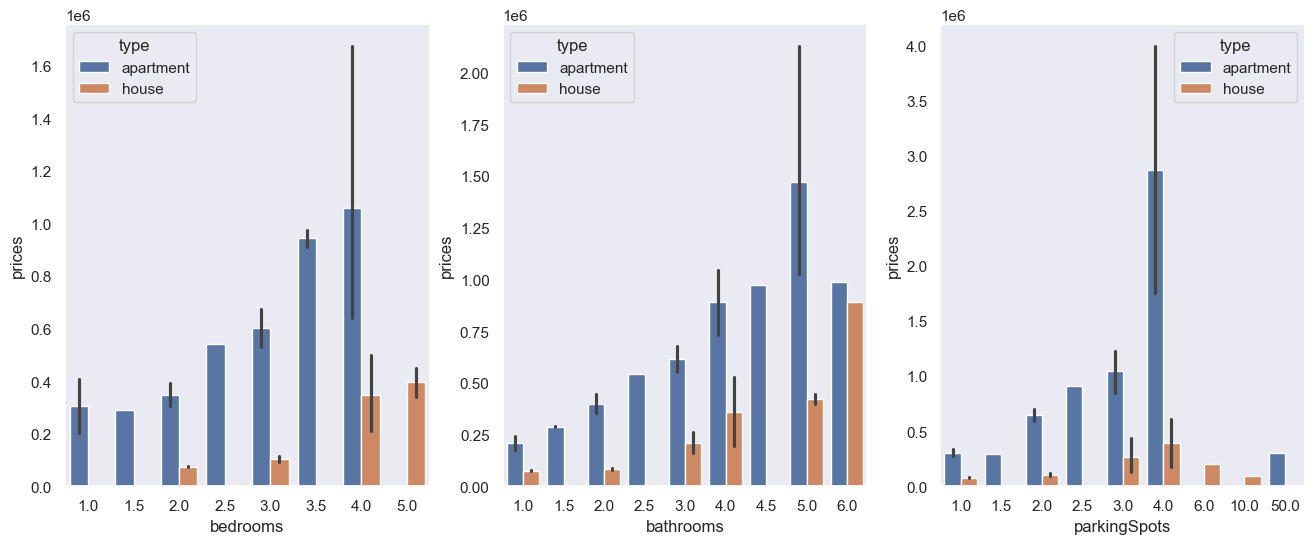

In [20]:
categories = ["bedrooms", "bathrooms", "parkingSpots"]

fig, ax = plt.subplots(1, 3, figsize=(16, 6))

for i in range(3):
    sns.barplot(x=df[categories[i]], y=df.prices, hue=df.type, ax=ax[i])